# DATA CLEANING
- Table Overview
- Renaming Columns
- Identifying Missing Values
- Scanning for Duplicate Values
- Data Integrity Check
- Unpacking the Skills From 'keywords_all' Column

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/data_jobs.csv')

In [19]:
df

,job_title_final,search_country,keywords_all,salary_year,job_via
0,Senior Data Engineer,United States,"{'list': [{'element': 'aws'}, {'element': 'spa...",NaN,KHON2 Jobs
1,Data Scientist,United States,"{'list': [{'element': 'python'}, {'element': '...",NaN,ViewAndApply
2,Data Scientist,Germany,"{'list': [{'element': 'r'}, {'element': 'pytho...",NaN,Your Basin Jobs
3,Data Analyst,United States,"{'list': [{'element': 'sql'}, {'element': 'pyt...",NaN,Jora
4,Data Analyst,United States,"{'list': [{'element': 'cobol'}, {'element': 'v...",NaN,DisABLEDperson.com
...,...,...,...,...,...
531102,Software Engineer,France,"{'list': [{'element': 'c++'}, {'element': 'pyt...",NaN,Emplois Trabajo.org
531103,Data Analyst,France,{'list': [{'element': 'excel'}]},NaN,Emplois Trabajo.org
531104,Data Analyst,France,"{'list': [{'element': 'vba'}, {'element': 'pow...",NaN,Emplois Trabajo.org
531105,Data Analyst,France,"{'list': [{'element': 'excel'}, {'element': 't...",NaN,Emplois Trabajo.org


## Table Overview
Conducting a comprehensive review of the dataset to gain an initial understanding of its structure, content, and format.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531107 entries, 0 to 531106
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   job_title_final  531107 non-null  object 
 1   search_country   531107 non-null  object 
 2   keywords_all     464773 non-null  object 
 3   salary_year      22653 non-null   float64
 4   job_via          531093 non-null  object 
dtypes: float64(1), object(4)
memory usage: 20.3+ MB


## Renaming Columns
Renaming columns for simplicity and for clarity.  

In [21]:
df.columns

Index(['job_title_final', 'search_country', 'keywords_all', 'salary_year',
       'job_via'],
      dtype='object')

In [3]:
df.rename(columns={
    'job_title_final': 'job_title', 
    'search_country': 'country', 
    'keywords_all': 'skill', 
    'salary_year': 'salary', 
    'job_via': 'job_platform'
}, inplace=True)

## Identifying Missing Values
Understanding and quantifying data points that are absen in the dataset.

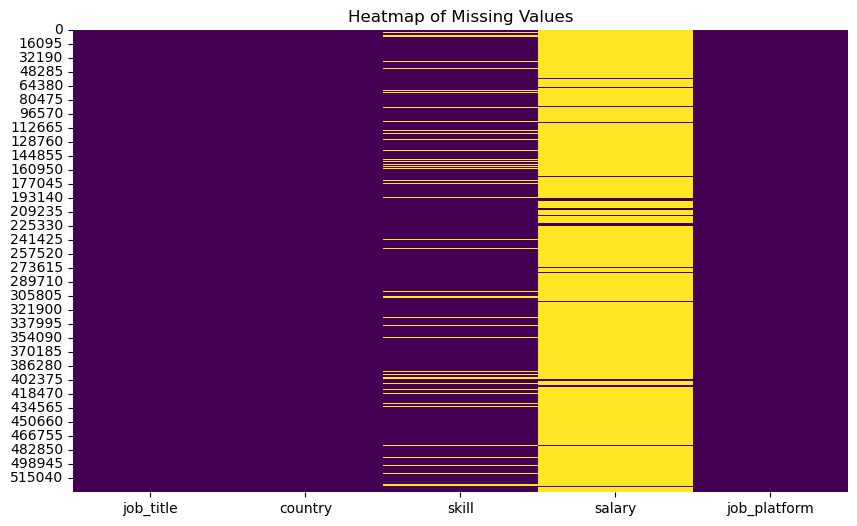

In [23]:
# Heatmap of null values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()
## Most of the salary information is missing. There are significant amount of null values under Keywords (skills) as well.

In [28]:
# Counting the total number of null values in each column
null_counts = df.isnull().sum()
print('Total number of missing values by column:')
null_counts
## Null values under the 'salary' column will remain since they have no part in skills analysis

Total number of missing values by column:


job_title            0
country              0
skill                0
salary          443938
job_platform        14
dtype: int64

In [4]:
# Dropping the missing values under the 'skill' column
df.dropna(subset=['skill'], inplace=True)

## Scanning for Duplicate Values
Duplicate rows will be retained in the dataset since there's no unique identifier available. It's very possible for job titles in the same country to share identical required skills, salary ranges, and job advertising platforms.

In [29]:
df.duplicated().sum()

181863

## Data Integrity Check
- Understanding how much removing the missing values have affected the dataset.
- Making sure there are no unwanted spaces, characters or words in our dataset

In [36]:
df2 = pd.read_csv('./data/data_jobs.csv')

In [30]:
df['job_title'].value_counts()

job_title
Data Analyst                 122051
Data Scientist               121911
Data Engineer                112251
Senior Data Engineer          29436
Senior Data Scientist         27903
Senior Data Analyst           23624
Business Analyst              13605
Software Engineer              8180
Machine Learning Engineer      3849
Cloud Engineer                 1963
Name: count, dtype: int64

In [38]:
# Comparing job titles with the original dataset
df2['job_title_final'].value_counts()

job_title_final
Data Analyst                 146767
Data Scientist               140674
Data Engineer                122239
Senior Data Engineer          30962
Senior Data Scientist         30926
Senior Data Analyst           26423
Business Analyst              16788
Software Engineer              9425
Machine Learning Engineer      4323
Cloud Engineer                 2580
Name: count, dtype: int64

In [31]:
df['country'].value_counts()

country
United States     260923
India              50719
France             40783
United Kingdom     40509
Germany            28656
Singapore          22371
Netherlands        20812
Name: count, dtype: int64

In [40]:
# Comparing countries with the original dataset
df2['search_country'].value_counts()

search_country
United States     291468
India              56730
France             48964
United Kingdom     48265
Germany            35777
Singapore          25338
Netherlands        24565
Name: count, dtype: int64

In [35]:
df['job_platform'].value_counts().head(20)

job_platform
LinkedIn             121690
BeBee                 48370
Indeed                28170
Trabajo.org           22126
Recruit.net           17946
ZipRecruiter          17373
Snagajob              13834
BeBee India            8908
BeBee Singapore        6976
Monster                6075
My ArkLaMiss Jobs      5288
SimplyHired            4961
Adzuna                 4896
WJHL Jobs              4706
Dice                   4478
Jobs Trabajo.org       4450
BeBee Nederland        4204
The Muse               4037
Nexxt                  3936
Jobijoba               3857
Name: count, dtype: int64

In [42]:
# Comparing job platforms with the original dataset
df2['job_via'].value_counts().head(20)

job_via
LinkedIn             132657
BeBee                 58596
Indeed                31210
Trabajo.org           26489
Recruit.net           20664
ZipRecruiter          19934
Snagajob              15337
BeBee India            9984
BeBee Singapore        8030
Monster                6411
My ArkLaMiss Jobs      6226
Adzuna                 6122
WJHL Jobs              5617
Jobs Trabajo.org       5397
SimplyHired            5385
Jobijoba               5017
Dice                   4881
BeBee Nederland        4879
Nexxt                  4378
The Muse               4341
Name: count, dtype: int64

In [48]:
## It appears that the removal of the missing 'skill' values were evenly distributed among the dataset

## Unpacking the Skills
It seems that the skills are stored in a structured format, each as a list of elements. They need to be unpacked in order to do any analysis with them.

In [6]:
import ast

# Function to parse the 'skill' column which is in string format representing a list of dictionaries
def parse_skills(skill_str):
    try:
        # Convert the string to an actual list of dictionaries
        skill_list = ast.literal_eval(skill_str)['list']
        # Extract just the skill names
        return [skill['element'] for skill in skill_list]
    except Exception as e:
        return []

# Apply the parsing function to each row in the 'skill' column
df['parsed_skills'] = df['skill'].apply(parse_skills)

# Display the first few rows of the dataset to confirm the parsing
df[['skill', 'parsed_skills']].head()


,skill,parsed_skills
0,"{'list': [{'element': 'aws'}, {'element': 'spa...","[aws, spark, kafka, java, scala, python, sql]"
1,"{'list': [{'element': 'python'}, {'element': '...","[python, sql, r, pyspark, databricks, scikit-l..."
2,"{'list': [{'element': 'r'}, {'element': 'pytho...","[r, python]"
3,"{'list': [{'element': 'sql'}, {'element': 'pyt...","[sql, python, r, tableau]"
4,"{'list': [{'element': 'cobol'}, {'element': 'v...","[cobol, vba, excel, sql]"


In [7]:
df

,job_title,country,skill,salary,job_platform,parsed_skills
0,Senior Data Engineer,United States,"{'list': [{'element': 'aws'}, {'element': 'spa...",NaN,KHON2 Jobs,"[aws, spark, kafka, java, scala, python, sql]"
1,Data Scientist,United States,"{'list': [{'element': 'python'}, {'element': '...",NaN,ViewAndApply,"[python, sql, r, pyspark, databricks, scikit-l..."
2,Data Scientist,Germany,"{'list': [{'element': 'r'}, {'element': 'pytho...",NaN,Your Basin Jobs,"[r, python]"
3,Data Analyst,United States,"{'list': [{'element': 'sql'}, {'element': 'pyt...",NaN,Jora,"[sql, python, r, tableau]"
4,Data Analyst,United States,"{'list': [{'element': 'cobol'}, {'element': 'v...",NaN,DisABLEDperson.com,"[cobol, vba, excel, sql]"
...,...,...,...,...,...,...
531102,Software Engineer,France,"{'list': [{'element': 'c++'}, {'element': 'pyt...",NaN,Emplois Trabajo.org,"[c++, python, flow, linux, git]"
531103,Data Analyst,France,{'list': [{'element': 'excel'}]},NaN,Emplois Trabajo.org,[excel]
531104,Data Analyst,France,"{'list': [{'element': 'vba'}, {'element': 'pow...",NaN,Emplois Trabajo.org,"[vba, power bi, powerpoint, excel]"
531105,Data Analyst,France,"{'list': [{'element': 'excel'}, {'element': 't...",NaN,Emplois Trabajo.org,"[excel, tableau, power bi]"


In [10]:
df = df.drop('skill', axis=1)

In [ ]:
# Unpacking the 'parsed_skills' column
df['parsed_skills'] = df['parsed_skills'].apply(lambda x: ', '.join(eval(x)))
df.head()

In [ ]:
# Function to replace standalone 'r' with 'R' in a string 
# This is for replacing lower case 'r' in skills. other skils were renamed using Excel.
# def replace_standalone_r(skill_str):
    # skills = skill_str.split(', ')
    # return ', '.join(['R' if skill.strip() == 'r' else skill for skill in skills])

# Applying the function to the 'skill' column
# df['skill'] = df['skill'].apply(replace_standalone_r)

df.head()

In [ ]:
#df.to_csv('./data/data_jobs.csv')